<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-3-amg-basics/21-AMG-advanced-options-systems-elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# you may need to install pyamg
!pip install pyamg

In [1]:
import numpy as np
import scipy.io as sio
import pyamg
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt
from matplotlib import collections
from matplotlib import tri
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Elasticity

In [2]:
A, B = pyamg.gallery.linear_elasticity((10,10))

In [3]:
B

array([[ 1. ,  0. ,  4.5],
       [ 0. ,  1. , -4.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. , -3.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. , -2.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. ,  1.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. ,  2.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. ,  3.5],
       [ 1. ,  0. ,  4.5],
       [ 0. ,  1. ,  4.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. , -4.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. , -3.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. , -2.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. ,  1.5],
       [ 1. ,  0. ,  3.5],
       [ 0. ,  1. ,  2.5],
       [ 1. ,  0. ,  3.5],
 

In [4]:
A

<200x200 sparse matrix of type '<class 'numpy.float64'>'
	with 3136 stored elements (blocksize = 2x2) in Block Sparse Row format>

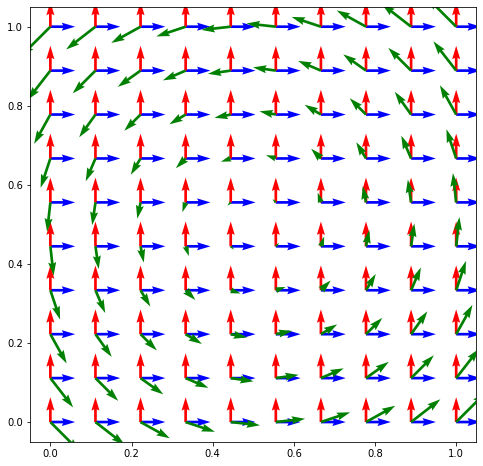

In [5]:
plt.figure(figsize=(8,8))
x, y = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
plt.quiver(x, y, B[0::2,0], B[1::2,0], color='b')
plt.quiver(x, y, B[0::2,1], B[1::2,1], color='r')
plt.quiver(x, y, B[0::2,2], B[1::2,2], color='g')

In [6]:
ml = pyamg.smoothed_aggregation_solver(A, B, max_coarse=5, keep=True)
print(ml)

multilevel_solver
Number of Levels:     3
Operator Complexity:  1.333
Grid Complexity:      1.300
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0          200         3136 [75.02%]
    1           48          900 [21.53%]
    2           12          144 [ 3.44%]



In [7]:
ml.levels[0].P.shape

(200, 48)

In [8]:
ml.levels[0].AggOp.shape

(100, 16)

In [9]:
res = []
x = ml.solve(np.random.rand(A.shape[0]), residuals=res)
res = np.array(res)
res[1:]/res[:-1]

array([0.02716991, 0.08864466, 0.11615648, 0.12565997, 0.13018331])

In [10]:
A = A.tocsr()
ml = pyamg.smoothed_aggregation_solver(A, max_coarse=5)
print(ml)

multilevel_solver
Number of Levels:     3
Operator Complexity:  1.037
Grid Complexity:      1.100
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0          200         3136 [96.43%]
    1           16          100 [ 3.08%]
    2            4           16 [ 0.49%]



In [11]:
res = []
x = ml.solve(np.random.rand(A.shape[0]), residuals=res)
res = np.array(res)
res[1:]/res[:-1]

array([0.06595416, 0.42724406, 0.49846623, 0.51270107, 0.51866318,
       0.52502997, 0.53395327, 0.54623163, 0.56181007, 0.57957638,
       0.59753772, 0.61361765, 0.62651762, 0.63598265, 0.64248006,
       0.64673798, 0.64944351])

In [12]:
res = []
x = ml.solve(np.random.rand(A.shape[0]), residuals=res, accel='cg')
res = np.array(res)
res[1:]/res[:-1]

array([0.04086628, 0.47197265, 0.10314693, 0.18019445, 0.18822815,
       0.20990102, 0.10619577])